In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
transactions = pd.read_excel('Raw_data.xlsx')

## Transactions_data.xlsx: 

#### This dataset included the transactions data of the customers across all the different states in Australia.

# Data Analysis Customer Segmentation

### Goal of the project

The purpose of this project is to conduct a Customer Segmentation Analysis for an Automobile bike Company. Customer segmentation is performed by developing a RFM Model. RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. In this analysis the customer segment was divided into 11 groups. The analysis will help in determining which customers segments should be targeted in order to enhance sales revenue for the company

### Column Descriptions

### 1. Transactions Worksheet

#### Transaction_id: This column inicates the transaction of every item sold 
#### Product_id: This column has an  id of every product available in the company
#### Customer_id: This column has an unique id for every customer who has purchased from the item
#### Transaction_date: This column has dates of every transactions
#### Online_order: This column indicates True(1) if customer has ordered online othwerwise False(0)
#### Order_status: This Column tells us if the order was approved or cancelled
#### Brand: This column contains the information about all brands of bikes in the company
#### Product_line: This column contains the product information about what kind of roads or hilly areas each bike is capable of riding
#### Product_Class: This column has information about classifications of products based on three parameters
1.High: This means product has been purchased more often

2.Medium: This means product has a normal selling value

3.Low: This means product has below_average selling value

#### Product_size: This column has information abuout size of the product based on large, medium and small
#### List_price: This column has the information ofthe product that was sold at a praticular price
#### Standard_cost: This column has the information about the cost of every product
####product_first_sold_date: This column has information about the date that a particular product was sold first time

### Messy Data


1. product_first_sold date column does not have a date time proper formatting 


### Dirty Data
1. online-order has a data type of float which should be change to object --> Validity issue
2. online_order has missing values --> Completeness issue
3. (Brand, product-size, product_ line, product_class, product_sold-first_date, standard_cost) has identical missing values --- Completeness issue

In [3]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


In [5]:
transactions.sample(12)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
5566,5567,5,3151,2017-10-09,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,40649.0
681,682,34,1747,2017-06-23,0.0,Approved,Norco Bicycles,Road,high,large,774.53,464.72,37698.0
13040,13041,44,2600,2017-01-27,0.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,41064.0
16407,16408,77,2513,2017-07-11,0.0,Approved,Norco Bicycles,Road,medium,large,1240.31,795.10,40553.0
1759,1760,86,1561,2017-03-12,1.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,41434.0
14229,14230,76,2482,2017-01-30,1.0,Approved,WeareA2B,Standard,low,medium,642.31,513.85,38193.0
13767,13768,89,263,2017-07-26,1.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,40336.0
11843,11844,38,771,2017-07-20,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
9173,9174,95,3132,2017-08-21,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,33364.0
3685,3686,57,2648,2017-08-17,0.0,Approved,WeareA2B,Touring,medium,large,1890.39,260.14,33259.0


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
#percentage of null values
transactions.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [9]:
transactions[transactions.duplicated('transaction_id')]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [10]:
transactions.duplicated().sum()

0

In [11]:
transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,42710.000000
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,2875.201110


In [12]:
transactions.shape

(20000, 13)

In [13]:
# select numeric columns
df_numeric = transactions.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = transactions.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


In [14]:
transactions_df = transactions.copy()

## Cleaaning the data in following order

#### Completeness --> Messy Data --> Validity --> Accuracy --> consistency

####  1. As there are 1.8% values that are missing in online-order column, we can perform mode imputation for this particular column

In [15]:
transactions_df[transactions_df["online_order"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [16]:
transactions_df['online_order'].mode()

0    1.0
Name: online_order, dtype: float64

In [17]:
transactions_df['online_order'].fillna(1, inplace = True)

#### Since 1 is the most frequent value of online order. We will do a mode imputation on this categorical value

In [18]:
transactions_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### there are no missing values in online_order

#### It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.

In [19]:
transactions_df[transactions_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [20]:
transactions_df[transactions_df['brand'].isnull()].sample(20)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
12322,12323,0,1898,2017-11-05,1.0,Approved,NaN,NaN,NaN,NaN,1294.37,NaN,NaN
15708,15709,0,1892,2017-03-24,1.0,Approved,NaN,NaN,NaN,NaN,1689.63,NaN,NaN
16660,16661,0,1313,2017-10-04,1.0,Approved,NaN,NaN,NaN,NaN,2061.38,NaN,NaN
1003,1004,0,2254,2017-05-16,0.0,Cancelled,NaN,NaN,NaN,NaN,205.84,NaN,NaN
14640,14641,0,1429,2017-02-23,0.0,Approved,NaN,NaN,NaN,NaN,1184.00,NaN,NaN
7779,7780,0,1576,2017-01-25,1.0,Approved,NaN,NaN,NaN,NaN,126.36,NaN,NaN
6499,6500,0,1665,2017-07-20,0.0,Approved,NaN,NaN,NaN,NaN,1957.87,NaN,NaN
6071,6072,0,2930,2017-03-01,1.0,Approved,NaN,NaN,NaN,NaN,1099.68,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
4652,4653,0,104,2017-03-08,0.0,Approved,NaN,NaN,NaN,NaN,1678.71,NaN,NaN


#### Dropping the rows with missing values

In [21]:
transactions_df[transactions_df.isnull()][["brand",'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
records_to_drop = transactions_df[transactions_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index

records_to_drop

Index([], dtype='int64')

In [23]:
transactions_df.drop(index=records_to_drop, axis=0, inplace = True)

In [24]:
transactions_df[transactions_df['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

0

##### Finally there are no Missing values in the transaction dataset.

In [25]:
transactions_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

#### Chaniging the datatype of product_first_sold_date column into datetime using timedelta as we are  dealing with Excel date type which is the number of days since 1900-01-01, as 1899-12-30(1 day behind)

In [26]:
from datetime import datetime, date


In [27]:
transactions['product_first_sold_date'] = pd.to_timedelta(transactions.product_first_sold_date, unit='D') + pd.to_datetime('1899-12-30')

In [28]:
transactions_df['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 19803, dtype: float64

In [29]:
transactions_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


### Creating a new feature "Profit"

The Profit column will be the difference between the list price and the standard price of a product.

In [30]:
transactions_df["profit"] = transactions_df["list_price"] - transactions_df["standard_cost"]

In [31]:
transactions_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


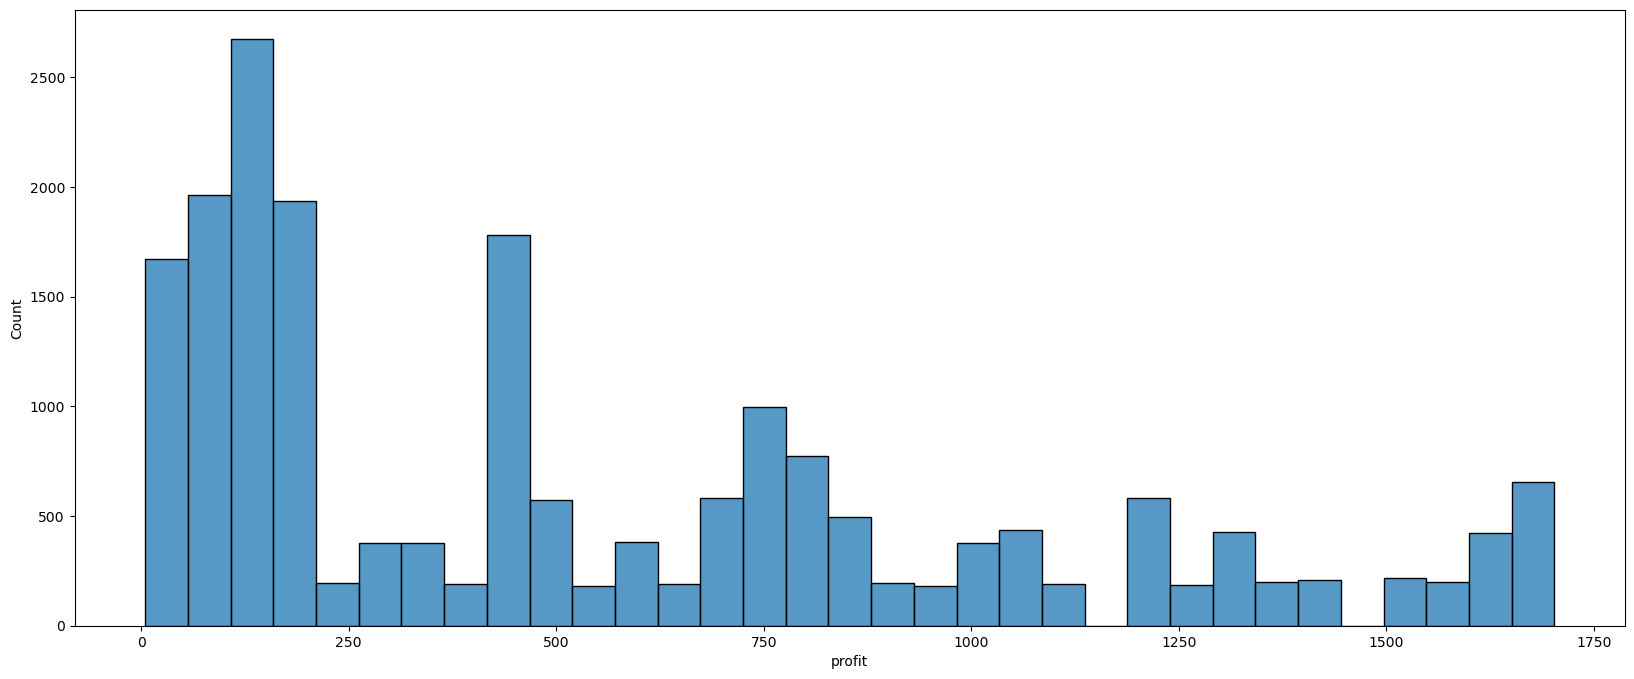

In [32]:
# distribution of profit
plt.figure(figsize=(20,8))
sns.histplot(data = transactions_df, x ="profit")
plt.show()

#  Exporting the Cleaned Transactions Data Set to csv

Currently the Transactions dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [33]:
transactions_df.to_csv("Transactions_data_cleaned", index= False)

In [34]:
transactions_df.shape

(19803, 14)